In [2]:
# EEG NN

In [3]:
## Import Libs

In [667]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
import pywt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
from sklearn.externals import joblib
#tf.enable_eager_execution()

In [5]:
## Variables And Constants

In [6]:
skipFeatures = 300

In [7]:
## Read Stored Data

In [717]:
df = pd.read_csv("C:\\Users\\Kruspe\\rawData_more.csv")
df.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v992,v993,v994,v995,v996,v997,v998,v999,v1000,label
0,48,48,49,48,49,49,49,49,49,49,...,35,3,3,3,3,3,3,3,3,right
1,21,21,21,33,33,33,33,33,33,33,...,23,23,23,23,23,23,23,23,44,left
2,35,35,35,35,35,35,35,35,35,35,...,18,18,18,18,18,18,18,18,18,left
3,33,33,33,33,13,13,13,13,13,13,...,41,41,41,41,41,41,41,41,41,left
4,66,66,66,66,66,66,66,66,66,66,...,36,36,36,36,36,36,36,36,36,left


In [686]:
## Scale Features

In [718]:
scaler = preprocessing.StandardScaler()

In [719]:
df.iloc[:,skipFeatures:1000] = scaler.fit_transform(df.iloc[:,skipFeatures:1000])

C:\Users\Kruspe\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Kruspe\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [720]:
joblib.dump(scaler , 'scaler.pkl')     # save to disk

['scaler.pkl']

In [ ]:
#scaler = joblib.load('my_scaler.pkl')  # load from disk

In [11]:
## Plot Average Data

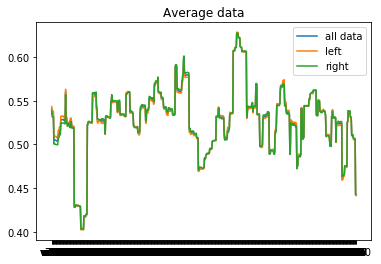

In [308]:
rdf = df.iloc[:,skipFeatures:1000]
lrdf = rdf[df.label=='left']
rrdf = rdf[df.label=='right']
rdfm = rdf.mean(axis=0)
lrdfm = lrdf.mean(axis=0)
rrdfm = rrdf.mean(axis=0)
plt.plot(rdfm, label="all data") 
plt.plot(lrdfm, label="left") 
plt.plot(rrdfm, label="right") 
plt.legend()
plt.title("Average data")
plt.show() 

In [389]:
## Plot Differencies

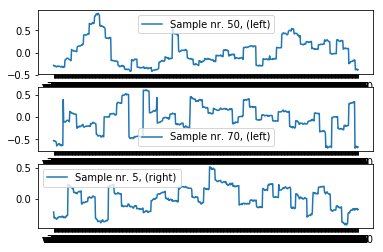

In [449]:
x = np.array([])
input1 = rdf.iloc[50]
v = "Sample nr. 50, (%s)" % (df.iloc[50].label)
plt.subplot(3,1,1)
plt.plot(input1, label=v)
plt.legend()
x = np.array([])
input2 = rdf.iloc[70]
v = "Sample nr. 70, (%s)" % (df.iloc[70].label)
plt.subplot(3,1,2)
plt.plot(input2, label=v)
plt.legend()
input3 = rdf.iloc[5]
v = "Sample nr. 5, (%s)" % (df.iloc[5].label)
plt.subplot(3,1,3)
plt.plot(input3, label=v)
plt.legend()
plt.show()

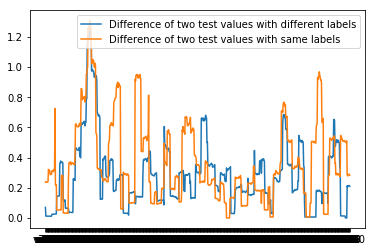

In [391]:
# Needs to be customized based on data
diff = input1-input3
diff2 = input1-input2
plt.plot(np.absolute(diff), label="Difference of two test values with different labels")
plt.plot(np.absolute(diff2), label="Difference of two test values with same labels")
plt.legend()
plt.show()

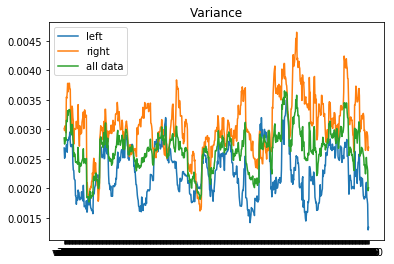

In [309]:
plt.plot(np.var(lrdf, axis=0), label="left")
plt.plot(np.var(rrdf, axis=0), label="right")
plt.plot(np.var(rdf, axis=0), label="all data")
plt.legend()
plt.title("Variance")
plt.show()

In [393]:
## Standard Deviation

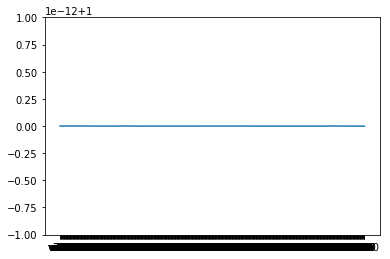

In [394]:
plt.plot(np.std(rdf, axis=0))

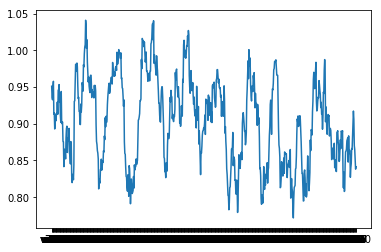

In [395]:
plt.plot(np.std(rdf[df.label=='left'], axis=0))

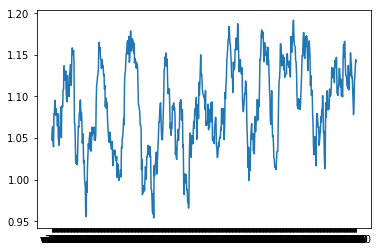

In [396]:
plt.plot(np.std(rdf[df.label=='right'], axis=0))

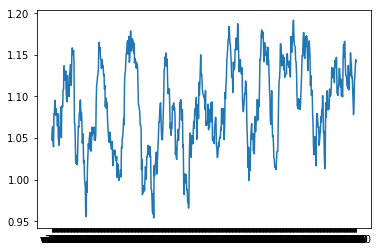

In [397]:
plt.plot(np.std(rrdf, axis=0))

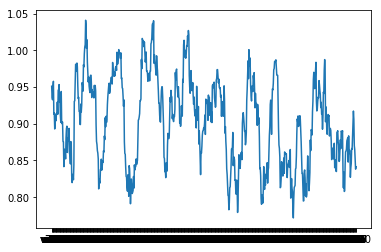

In [398]:
plt.plot(np.std(lrdf, axis=0))

In [399]:
##Fast Fourier Transform

In [552]:
tfc, tfv = rdf.shape
matrix = rdf.to_numpy()

In [553]:
ff = np.zeros(shape=(tfc,tfv), dtype=complex)
c = 0;
for f in matrix:
    x = np.array([])
    for e in f:
        x = np.append(x, int(e))
    ff[c] = np.fft.fft(x)
    c = c+1

C:\Users\Kruspe\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


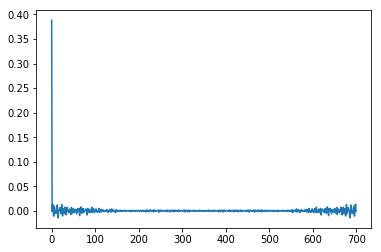

In [554]:
ffm = ff.mean(axis=0)
plt.plot(ffm) 
plt.show() 

In [312]:
##WaveDecomposition

In [555]:
cA2a = np.empty(shape=(tfc,17), dtype=complex)
cD1a = np.empty(shape=(tfc,17), dtype=complex)
cD2a = np.empty(shape=(tfc,28), dtype=complex)
cD3a = np.empty(shape=(tfc,50), dtype=complex)
cD4a = np.empty(shape=(tfc,93), dtype=complex)
cD5a = np.empty(shape=(tfc,180), dtype=complex)
cD6a = np.empty(shape=(tfc,353), dtype=complex)
i = 0;
for w in ff:
    coeffs = pywt.wavedec(w, 'db4', level=6)
    cA2,cD1,cD2,cD3,cD4,cD5,cD6 = coeffs
    cA2a[i] = cD1
    cD1a[i] = cA2
    cD2a[i] = cD2
    cD3a[i] = cD3
    cD4a[i] = cD4
    cD5a[i] = cD5
    cD6a[i] = cD6
    i = i+1
#ca = np.append(ca, coeffs)
#ca = np.append(ca, coeffs)
#for wd in ff:
    #coeffs = pywt.wavedec(x, 'db4', level=6)
    #cA2,cD1,cD2,cD3,cD4,cD5,cD6 = coeffs

In [556]:
print (cA2.shape,cD1.shape,cD2.shape,cD3.shape,cD4.shape,cD5.shape, cD6.shape)

(17,) (17,) (28,) (50,) (93,) (180,) (353,)


In [758]:
##Average Channel Values

C:\Users\Kruspe\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


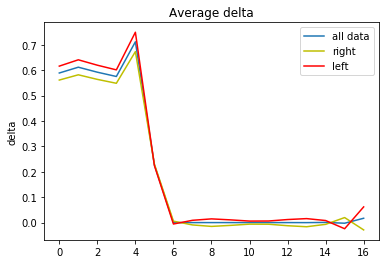

In [759]:
cD1am = cD1a.mean(axis=0)
cD1aml = cD1a[df.label=="left"].mean(axis=0)
cD1amr = cD1a[df.label=="right"].mean(axis=0)
plt.plot(cD1am, label="all data") 
plt.plot(cD1amr, 'y', label="right") 
plt.plot(cD1aml, 'r', label="left") 
plt.ylabel("delta")
plt.legend()
plt.title("Average delta")
plt.show() 

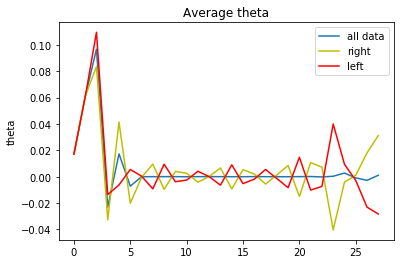

In [760]:
cD2am = cD2a.mean(axis=0)
cD2aml = cD2a[df.label=="left"].mean(axis=0)
cD2amr = cD2a[df.label=="right"].mean(axis=0)
plt.plot(cD2am, label="all data") 
plt.plot(cD2amr, 'y', label="right") 
plt.plot(cD2aml, 'r', label="left") 
plt.ylabel("theta")
plt.legend()
plt.title("Average theta")
plt.show() 

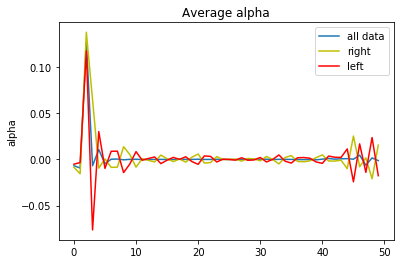

In [761]:
cD3am = cD3a.mean(axis=0)
cD3aml = cD3a[df.label=="left"].mean(axis=0)
cD3amr = cD3a[df.label=="right"].mean(axis=0)
plt.plot(cD3am, label="all data") 
plt.plot(cD3amr, 'y', label="right") 
plt.plot(cD3aml, 'r', label="left") 
plt.ylabel("alpha")
plt.legend()
plt.title("Average alpha")
plt.show() 

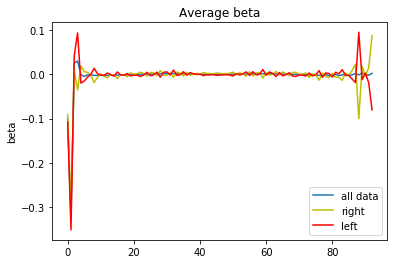

In [762]:
cD4am = cD4a.mean(axis=0)
cD4aml = cD4a[df.label=="left"].mean(axis=0)
cD4amr = cD4a[df.label=="right"].mean(axis=0)
plt.plot(cD4am, label="all data") 
plt.plot(cD4amr, 'y', label="right") 
plt.plot(cD4aml, 'r', label="left") 
plt.ylabel("beta")
plt.legend()
plt.title("Average beta")
plt.show() 

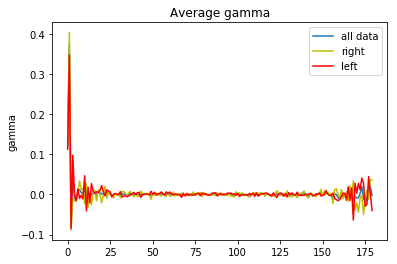

In [763]:
cD5am = cD5a.mean(axis=0)
cD5aml = cD5a[df.label=="left"].mean(axis=0)
cD5amr = cD5a[df.label=="right"].mean(axis=0)
plt.plot(cD5am, label="all data") 
plt.plot(cD5amr, 'y', label="right") 
plt.plot(cD5aml, 'r', label="left") 
plt.ylabel("gamma")
plt.legend()
plt.title("Average gamma")
plt.show() 

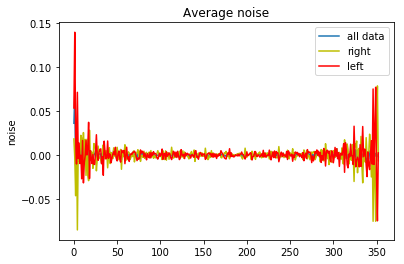

In [764]:
cD6am = cD6a.mean(axis=0)
cD6aml = cD6a[df.label=="left"].mean(axis=0)
cD6amr = cD6a[df.label=="right"].mean(axis=0)
plt.plot(cD6am, label="all data") 
plt.plot(cD6amr, 'y', label="right") 
plt.plot(cD6aml, 'r', label="left") 
plt.ylabel("noise")
plt.legend()
plt.title("Average noise")
plt.show() 

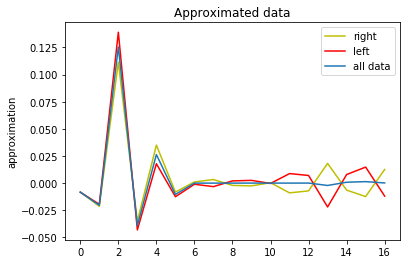

In [765]:
cA2am = cA2a.mean(axis=0)
cA2aml = cA2a[df.label=="left"].mean(axis=0)
cA2amr = cA2a[df.label=="right"].mean(axis=0)
plt.plot(cA2amr, 'y', label="right") 
plt.plot(cA2aml, 'r', label="left") 
plt.plot(cA2am, label="all data") 
plt.ylabel("approximation")
plt.legend()
plt.title("Approximated data")
plt.show() 

In [766]:
approx_real = cA2a.real
approx_imag = cA2a.imag

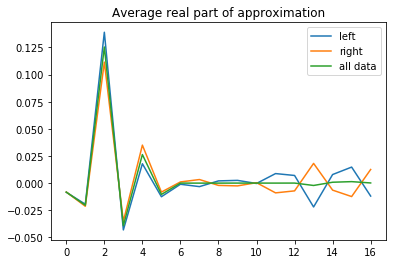

In [767]:
plt.plot(approx_real[df.label=='left'].mean(axis=0), label="left")
plt.plot(approx_real[df.label=='right'].mean(axis=0), label="right")
plt.plot(approx_real.mean(axis=0), label="all data")
plt.legend()
plt.title("Average real part of approximation")
plt.show()

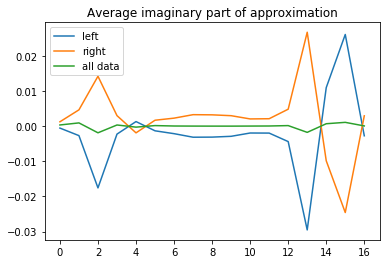

In [768]:
plt.plot(approx_imag[df.label=='left'].mean(axis=0), label="left")
plt.plot(approx_imag[df.label=='right'].mean(axis=0), label="right")
plt.plot(approx_imag.mean(axis=0), label="all data")
plt.legend()
plt.title("Average imaginary part of approximation")
plt.show()

In [769]:
## Defining NN Input

In [327]:
approx_imag.shape

(1700, 17)

In [770]:
approx_imag = approx_imag.astype(np.float32)

In [560]:
cD2a = cD2a.astype(np.float32)

C:\Users\Kruspe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


In [561]:
delta = cD1a.real.astype(np.float32)

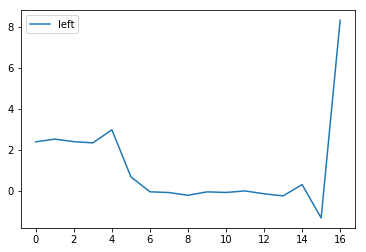

In [472]:
plt.plot(delta.mean(axis=0), label="left")
plt.legend()
plt.show()

In [473]:
## Setting up NN

In [869]:
X = df.iloc[:,skipFeatures:1000].values
y = df.iloc[:,1000].values

In [777]:
## Renaming labels

In [905]:
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values
from keras.utils.np_utils import to_categorical
encoder.fit(y)
Y = encoder.transform(y)
Y = to_categorical(Y)

In [906]:
## Splitting data

In [910]:
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state=10)

In [393]:
## Keras

In [795]:
model = Sequential()

In [796]:
from keras.regularizers import l1, l2
model.add(Dense(17,input_shape=(17,),activation='tanh'))
model.add(Dense(30,activation='tanh'))#, activity_regularizer=l1(0.2)))
model.add(Dense(30,activation='tanh'))#, activity_regularizer=l2(0.2)))
model.add(Dense(2,activation='softmax'))

In [797]:
model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

In [798]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_282 (Dense)            (None, 17)                306       
_________________________________________________________________
dense_283 (Dense)            (None, 30)                540       
_________________________________________________________________
dense_284 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_285 (Dense)            (None, 2)                 62        
Total params: 1,838
Trainable params: 1,838
Non-trainable params: 0
_________________________________________________________________


In [799]:
## Train NN

In [800]:
model.fit(X_train,y_train,epochs=100)#, batch_size = 32)

Epoch 1/100
1530/1530 [==============================] - 3s 2ms/step - loss: 0.7054 - acc: 0.5105
Epoch 2/100
1530/1530 [==============================] - 0s 80us/step - loss: 0.7150 - acc: 0.4830
Epoch 3/100
1530/1530 [==============================] - 0s 93us/step - loss: 0.7013 - acc: 0.4791
Epoch 4/100
1530/1530 [==============================] - 0s 92us/step - loss: 0.6960 - acc: 0.5111
Epoch 5/100
1530/1530 [==============================] - 0s 89us/step - loss: 0.6973 - acc: 0.5105
Epoch 6/100
1530/1530 [==============================] - 0s 88us/step - loss: 0.7019 - acc: 0.5183
Epoch 7/100
1530/1530 [==============================] - 0s 88us/step - loss: 0.7049 - acc: 0.4954
Epoch 8/100
1530/1530 [==============================] - 0s 89us/step - loss: 0.7030 - acc: 0.4928
Epoch 9/100
1530/1530 [==============================] - 0s 86us/step - loss: 0.6966 - acc: 0.4980
Epoch 10/100
1530/1530 [==============================] - 0s 95us/step - loss: 0.7012 - acc: 0.4778
Epoch 11/1

1530/1530 [==============================] - 0s 96us/step - loss: 0.7242 - acc: 0.4974
Epoch 83/100
1530/1530 [==============================] - 0s 99us/step - loss: 0.7221 - acc: 0.4843
Epoch 84/100
1530/1530 [==============================] - 0s 99us/step - loss: 0.7081 - acc: 0.4850
Epoch 85/100
1530/1530 [==============================] - 0s 107us/step - loss: 0.7349 - acc: 0.5131
Epoch 86/100
1530/1530 [==============================] - 0s 101us/step - loss: 0.7133 - acc: 0.4954
Epoch 87/100
1530/1530 [==============================] - 0s 100us/step - loss: 0.7215 - acc: 0.4850
Epoch 88/100
1530/1530 [==============================] - 0s 93us/step - loss: 0.7338 - acc: 0.4974
Epoch 89/100
1530/1530 [==============================] - 0s 93us/step - loss: 0.7206 - acc: 0.4843
Epoch 90/100
1530/1530 [==============================] - 0s 104us/step - loss: 0.7289 - acc: 0.5007
Epoch 91/100
1530/1530 [==============================] - 0s 95us/step - loss: 0.7208 - acc: 0.5098
Epoch 92/

In [249]:
## Predict Test Set

In [343]:
y_pred = model.predict(X_test)

In [344]:
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [345]:
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.66      0.26      0.37        97
           1       0.45      0.82      0.59        73

   micro avg       0.50      0.50      0.50       170
   macro avg       0.56      0.54      0.48       170
weighted avg       0.57      0.50      0.46       170

[[25 72]
 [13 60]]


In [295]:
y_pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [536]:
#init_op = tf.global_variables_initializer()
#
## Add ops to save and restore all the variables.
#saver = tf.train.Saver()

In [ ]:
#with tf.Session() as sess:
#  sess.run(init_op)
#  save_path = saver.save(sess, "/tmp/model.ckpt")
#  print("Model saved in file: %s" % save_path)

In [871]:
#v = np.array([], dtype=object)
v = X_train.astype('object')
v2 = y_train.astype('object')

In [872]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(v,v2)
lr_predict = lr_model.predict(X_test)
print('lr - ',accuracy_score(lr_predict,y_test))

C:\Users\Kruspe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


lr -  0.5411764705882353


In [873]:
sampleID = 27
rtd = X_test[sampleID].reshape(1, -1)
rttv = np.array([], dtype=object)
rttv = np.append(rttv, y_test[sampleID] )
lr_predict = lr_model.predict(rtd)
print('lr - ',accuracy_score(lr_predict,rttv))

lr -  1.0


In [874]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [875]:
from sklearn.metrics import accuracy_score 
knn_predict = knn_model.predict(X_test)
print('knn - ',accuracy_score(knn_predict,y_test))

knn -  0.5117647058823529


In [876]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(v,v2)
nb_predict = nb_model.predict(X_test)
print('Naive bayes - ',accuracy_score(nb_predict,y_test))

Naive bayes -  0.5411764705882353


In [877]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_leaf_nodes=2)
dt_model.fit(X_train,y_train)
dt_predict = dt_model.predict(X_test)
print('Decision Tree - ',accuracy_score(dt_predict,y_test))

Decision Tree -  0.5764705882352941


In [741]:
from sklearn.ensemble import RandomForestClassifier

In [893]:
rfc_model = RandomForestClassifier(max_depth=3)
rfc_model.fit(X_train,y_train)
rfc_predict = rfc_model.predict(X_test)
print('Random Forest - ',accuracy_score(rfc_predict,y_test))

Random Forest -  0.47058823529411764


C:\Users\Kruspe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [900]:
from sklearn.ensemble import ExtraTreesClassifier
etc_model = ExtraTreesClassifier(n_estimators = 700)
etc_model.fit(X_train,y_train)
etc_predict = etc_model.predict(X_test)
print('Extra Tree Classifier - ',accuracy_score(etc_predict,y_test))

Extra Tree Classifier -  0.4647058823529412


C:\Users\Kruspe\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [864]:
from xgboost.sklearn import XGBClassifier
xg_model = XGBClassifier()
xg_model = xg_model.fit(X_train,y_train)
xg_model.score(X_test, y_test)

ValueError: bad input shape (1530, 2)

In [865]:
from keras.layers import Dropout

In [908]:
shallow_model = Sequential()
shallow_model.add(Dense( 700, input_dim=700, activation = 'relu'))
shallow_model.add(Dense( units = 2100, activation= 'relu'))
shallow_model.add(Dropout(0.2))
shallow_model.add(Dense( units = 2, activation= 'softmax'))
shallow_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [923]:
shallow_history = shallow_model.fit(X_train, y_train, epochs = 1, validation_data = (X_test, y_test))

Train on 1530 samples, validate on 170 samples
Epoch 1/1
1530/1530 [==============================] - 2s 2ms/step - loss: 0.0406 - acc: 0.9908 - val_loss: 3.8683 - val_acc: 0.5765


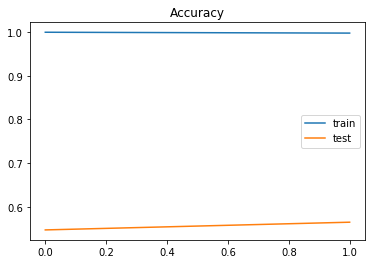

In [914]:
plt.plot(shallow_history.history['acc'])
plt.plot(shallow_history.history['val_acc'])
plt.title("Accuracy")
plt.legend(['train', 'test'])
plt.show()

In [376]:
from sklearn.preprocessing import LabelBinarizer
y_test2 = LabelBinarizer().fit_transform(y_test)

In [822]:
deep_model = Sequential()
deep_model.add(Dense( 17, input_dim=17, activation = 'relu'))
deep_model.add(Dense( units = 34, activation= 'relu'))
#deep_model.add(Dropout(0.2))
deep_model.add(Dense( units = 34, activation= 'relu'))
#deep_model.add(Dropout(0.2))
deep_model.add(Dense( units = 34, activation= 'relu'))
#deep_model.add(Dropout(0.2))
deep_model.add(Dense( units = 34, activation= 'relu'))
#deep_model.add(Dropout(0.2))
deep_model.add(Dense( units = 34, activation= 'relu'))
#deep_model.add(Dropout(0.2))
deep_model.add(Dense( units = 34, activation= 'relu'))
#deep_model.add(Dropout(0.2))
deep_model.add(Dense( units = 34, activation= 'relu'))
#deep_model.add(Dropout(0.2))
deep_model.add(Dense( units = 34, activation= 'relu'))
#deep_model.add(Dropout(0.2))
deep_model.add(Dense( units = 2, activation= 'softmax'))
deep_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [911]:
deep_history = deep_model.fit(X_train, y_train, epochs = 150, validation_data = (X_test, y_test))

ValueError: Error when checking input: expected dense_306_input to have shape (17,) but got array with shape (700,)

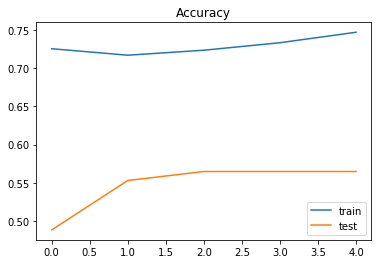

In [532]:
plt.plot(deep_history.history['acc'])
plt.plot(deep_history.history['val_acc'])
plt.title("Accuracy")
plt.legend(['train', 'test'])
plt.show()

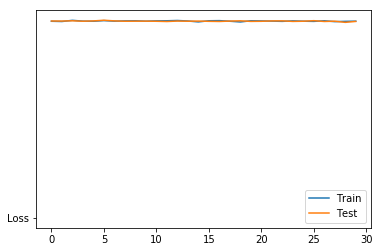

In [360]:
plt.plot(deep_history.history['loss'])
plt.plot(deep_history.history['val_loss'])
plt.plot('Loss')
plt.legend(['Train','Test'])
plt.show()

In [584]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection

In [700]:
dft = df.values
Xt = dft[:,skipFeatures:1000]
yt = dft[:,1000]

In [589]:
seed = 10
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=1000, random_state=seed)
    cv_results = model_selection.cross_val_score(model, Xt, yt, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\Kruspe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kruspe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kruspe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kruspe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Kruspe\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

KeyboardInterrupt: 